In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.datasets import make_circles

In [2]:
device = 'cpu'

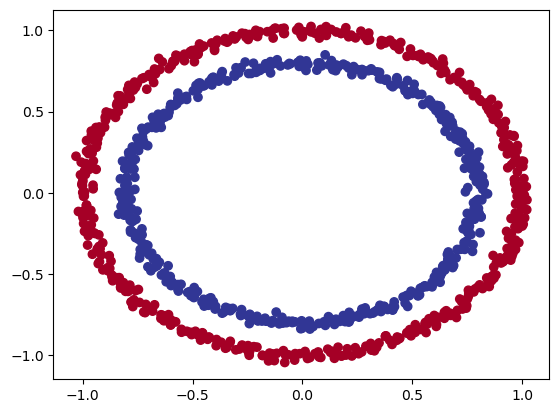

In [3]:
n_sample = 1000
X, y = make_circles(n_samples=n_sample, noise=0.02, random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [4]:
from sklearn.model_selection import train_test_split
print(f"Before: {type(X)}, {type(y)}")
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"After: {type(X)}, {type(y)}")

Before: <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
After: <class 'torch.Tensor'>, <class 'torch.Tensor'>


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train = ", X_train.shape)
print("Shape of y_train = ", y_train.shape)

Shape of X_train =  torch.Size([800, 2])
Shape of y_train =  torch.Size([800])


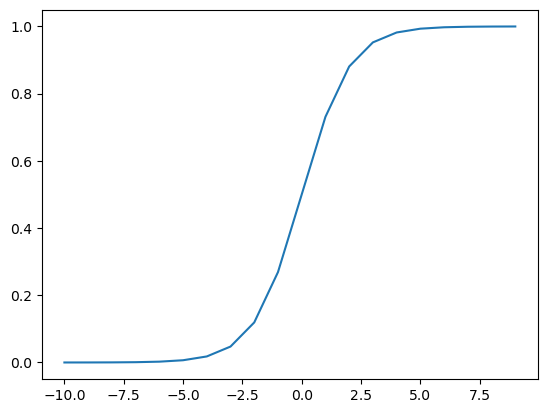

In [6]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

plt.plot(range(-10, 10), [sigmoid(x) for x in range(-10, 10)])

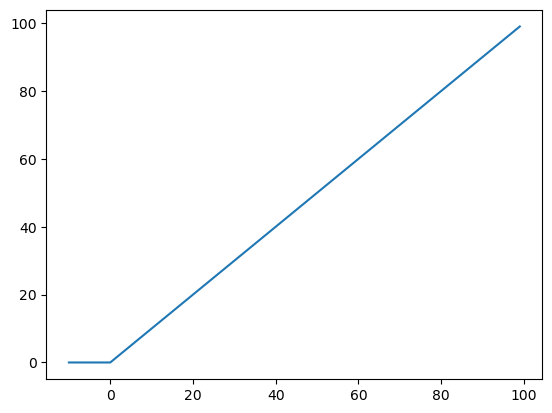

In [7]:
def RELU(X):
    if (X <= 0):
        return 0
    else:
        return X

plt.plot(range(-10, 100), [RELU(x) for x in range(-10, 100)])

In [8]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, X):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))

In [9]:
model_0 = CircleModel()
model_0.to(device)
next(model_0.parameters()).device

device(type='cpu')

In [10]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1851,  0.2734],
                      [-0.3451, -0.1717],
                      [ 0.3833,  0.1223],
                      [ 0.3136,  0.6698],
                      [ 0.6433, -0.0316],
                      [ 0.6517, -0.2120],
                      [ 0.3930, -0.3778],
                      [ 0.1815, -0.3438],
                      [ 0.5275,  0.2329],
                      [ 0.4299, -0.5391]])),
             ('layer_1.bias',
              tensor([-0.1161,  0.2524,  0.6238, -0.0593,  0.3521, -0.0208, -0.1650,  0.4961,
                      -0.0748,  0.1816])),
             ('layer_2.weight',
              tensor([[ 0.0023,  0.1737, -0.2864, -0.1671,  0.2117, -0.3116,  0.0496,  0.1634,
                       -0.2885, -0.2278],
                      [ 0.1222, -0.0372, -0.1894, -0.1820, -0.1974,  0.2497, -0.0802, -0.0812,
                        0.0950,  0.2067],
                      [ 0.1756,  0.1712,  0.2859, -0.1719,  0.2206,  0.0

In [11]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
    params=model_0.parameters(), lr = 0.05
)

In [12]:
def accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [13]:
epochs = 3000
torch.manual_seed(42) 
trainLossList = []
testLossList = []
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_0.train() 

    # forward pass 
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # training loss
    loss = loss_fn(y_logits, y_train)
    trainLossList.append(loss.cpu().detach().numpy())

    # zero grad optimizer
    optimizer.zero_grad()

    # backpropagation 
    loss.backward()

    optimizer.step()

    acc = accuracy(y_true=y_train, y_pred=y_pred)

    model_0.eval()
    with torch.inference_mode(): 
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        testLossList.append(test_loss.cpu().detach().numpy())
        test_acc = accuracy(y_test, test_preds)


    if epoch %10 == 0:
        print(
            f"Epoch: {epoch} | Train Loss: {loss:.4f} | Test Loss: {test_loss:.4f}"
            f"\n     | Train Accuracy: {acc:.4f} | Test Accuracy: {test_acc:.4f}"
        )
    

Epoch: 0 | Train Loss: 0.6963 | Test Loss: 0.6983
     | Train Accuracy: 50.0000 | Test Accuracy: 50.0000
Epoch: 10 | Train Loss: 0.6950 | Test Loss: 0.6972
     | Train Accuracy: 50.0000 | Test Accuracy: 50.0000
Epoch: 20 | Train Loss: 0.6941 | Test Loss: 0.6964
     | Train Accuracy: 50.0000 | Test Accuracy: 50.0000
Epoch: 30 | Train Loss: 0.6934 | Test Loss: 0.6957
     | Train Accuracy: 49.5000 | Test Accuracy: 49.0000
Epoch: 40 | Train Loss: 0.6929 | Test Loss: 0.6953
     | Train Accuracy: 42.0000 | Test Accuracy: 39.5000
Epoch: 50 | Train Loss: 0.6926 | Test Loss: 0.6950
     | Train Accuracy: 45.7500 | Test Accuracy: 47.0000
Epoch: 60 | Train Loss: 0.6923 | Test Loss: 0.6948
     | Train Accuracy: 47.5000 | Test Accuracy: 45.5000
Epoch: 70 | Train Loss: 0.6921 | Test Loss: 0.6946
     | Train Accuracy: 50.2500 | Test Accuracy: 46.0000
Epoch: 80 | Train Loss: 0.6919 | Test Loss: 0.6944
     | Train Accuracy: 50.5000 | Test Accuracy: 46.5000
Epoch: 90 | Train Loss: 0.6918 | Test 

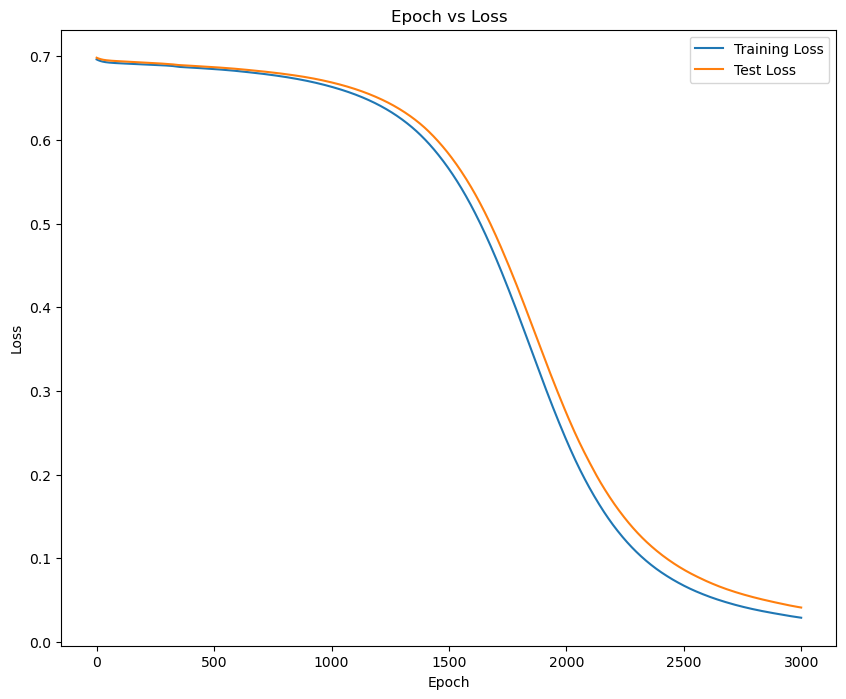

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()